In [353]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime


In [360]:
#For CSV files
inaData = pd.read_csv('ina219-2019-08-23-1566593409.csv').fillna(0)

In [361]:
print(inaData.shape)
inaData.head()

(3956, 3)


,mA,V,time
0,496.2,4.576,1.566593e+09
1,494.6,4.576,1.566593e+09
2,495.9,4.576,1.566593e+09
3,496.5,4.576,1.566593e+09
4,496.6,4.576,1.566593e+09


In [362]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [363]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [364]:
inaData.head()

,mA,V,watts,time
0,496.2,4.576,2.270611,1.566593e+09
1,494.6,4.576,2.263290,1.566593e+09
2,495.9,4.576,2.269238,1.566593e+09
3,496.5,4.576,2.271984,1.566593e+09
4,496.6,4.576,2.272442,1.566593e+09


In [365]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.220261671522683

In [366]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [367]:
print averagedINA.shape
averagedINA.head()

(259, 4)


,mA,V,watts,time
0,496.240000,4.576,2.270794,1.566593e+09
1,496.340000,4.576,2.271252,1.566593e+09
2,496.466667,4.576,2.271831,1.566593e+09
3,496.120000,4.576,2.270245,1.566593e+09
4,496.720000,4.576,2.272991,1.566593e+09


In [368]:
seleniumData = pd.read_csv('selenium-2019-08-23-1566593411.csv').fillna(0)


In [369]:
print(seleniumData.shape)
seleniumData.tail()

(147, 2)


,task,time
142,click,1.566594e+09
143,click,1.566594e+09
144,click,1.566594e+09
145,click,1.566594e+09
146,stop static 1,1.566594e+09


In [370]:
startTimeD1 = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic 0']
stopTimeD1 = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic 0']

startTimeS1 = seleniumData.loc[seleniumData.loc[:,'task']=='start static 0']
stopTimeS1 = seleniumData.loc[seleniumData.loc[:,'task']=='stop static 0']

startTimeD2 = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic 1']
stopTimeD2 = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic 1']

startTimeS2 = seleniumData.loc[seleniumData.loc[:,'task']=='start static 1']
stopTimeS2 = seleniumData.loc[seleniumData.loc[:,'task']=='stop static 1']

In [371]:
print startTimeD1
print stopTimeD1
print startTimeS1
print stopTimeS1
print startTimeD2
print stopTimeD2
print startTimeS2
print stopTimeS2

              task          time
0  start dynamic 0  1.566593e+09
              task          time
35  stop dynamic 0  1.566593e+09
              task          time
36  start static 0  1.566594e+09
             task          time
72  stop static 0  1.566594e+09
               task          time
73  start dynamic 1  1.566594e+09
               task          time
109  stop dynamic 1  1.566594e+09
               task          time
110  start static 1  1.566594e+09
              task          time
146  stop static 1  1.566594e+09


In [372]:
#make new data frame with power date from only test duration
inaTestDataD1 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeD1.time[0]) & (averagedINA.loc[:,'time']<=stopTimeD1.time[35])]
print(inaTestDataD1.shape)

#make new data frame with power date from only test duration
inaTestDataD2 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeD2.time[73]) & (averagedINA.loc[:,'time']<=stopTimeD2.time[109])]
print(inaTestDataD2.shape)

(24, 4)
(24, 4)


In [373]:
#make new data frame with power date from only test duration
inaTestDataS1 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeS1.time[36]) & (averagedINA.loc[:,'time']<=stopTimeS1.time[72])]
print(inaTestDataS1.shape)

inaTestDataS2 = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeS2.time[110]) & (averagedINA.loc[:,'time']<=stopTimeS2.time[146])]
print(inaTestDataS2.shape)

(24, 4)
(24, 4)


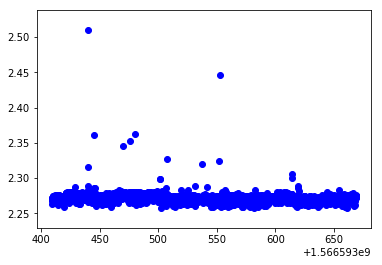

In [374]:

#graph all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


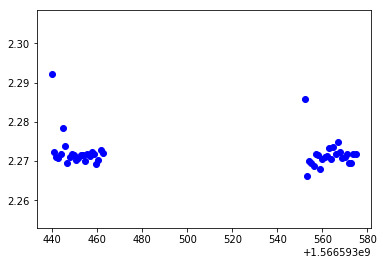

In [375]:
#graph dynamic data
plt.scatter(x=inaTestDataD1.loc[:,'time'], y=inaTestDataD1.loc[:,'watts'], color='b')
plt.scatter(x=inaTestDataD2.loc[:,'time'], y=inaTestDataD2.loc[:,'watts'], color='b')


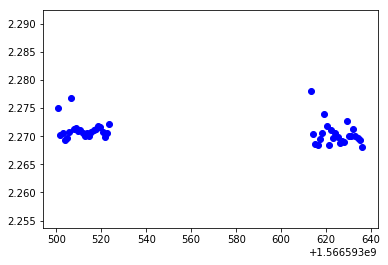

In [376]:
#graph static data
plt.scatter(x=inaTestDataS1.loc[:,'time'], y=inaTestDataS1.loc[:,'watts'], color='b')
plt.scatter(x=inaTestDataS2.loc[:,'time'], y=inaTestDataS2.loc[:,'watts'], color='b')


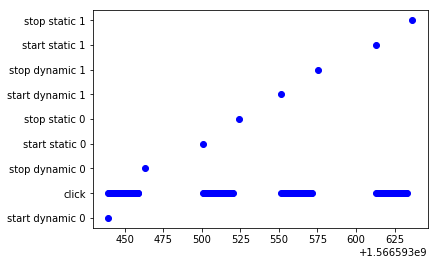

In [377]:

# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

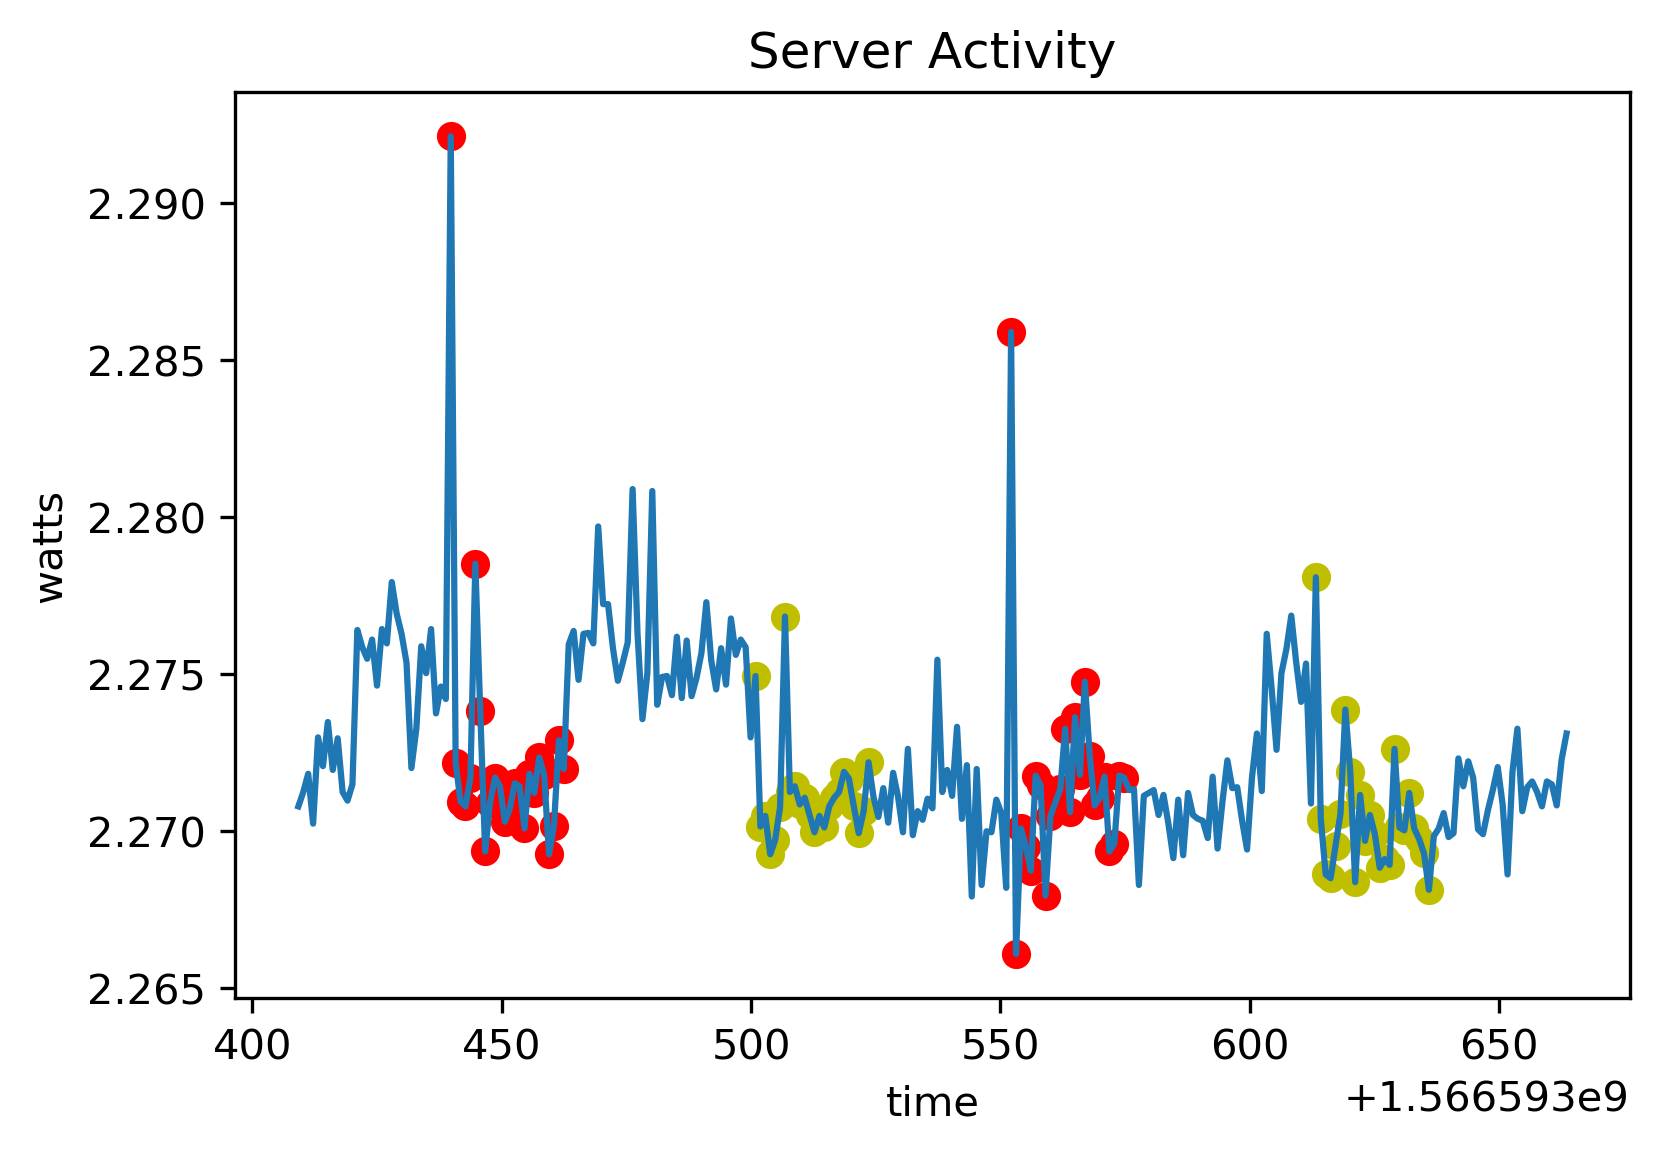

In [378]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='time', ylabel='watts',
       title='Server Activity')

ax.scatter(x=inaTestDataD1.loc[:,'time'], y=inaTestDataD1.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS1.loc[:,'time'], y=inaTestDataS1.loc[:,'watts'], color='y')

ax.scatter(x=inaTestDataD2.loc[:,'time'], y=inaTestDataD2.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS2.loc[:,'time'], y=inaTestDataS2.loc[:,'watts'], color='y')

#ax.grid()

fig.savefig("aggregatoroutput_aug23-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png")
plt.show()

In [379]:
overlayD1 = inaTestDataD1
#should this be normalized instead?
overlayD1.insert(4, 'scaled', overlayD1.time - overlayD1.time[overlayD1.time.index[0]], True)

overlayD2 = inaTestDataD2
#should this be normalized instead?
overlayD2.insert(4, 'scaled', overlayD2.time - overlayD2.time[overlayD2.time.index[0]], True)

overlayS1 = inaTestDataS1
#should this be normalized instead?
overlayS1.insert(4, 'scaled', overlayS1.time - overlayS1.time[overlayS1.time.index[0]], True)


overlayS2 = inaTestDataS2
#should this be normalized instead?
overlayS2.insert(4, 'scaled', overlayS2.time - overlayS2.time[overlayS2.time.index[0]], True)

In [380]:
overlayD2

,mA,V,watts,time,scaled
145,499.540000,4.576,2.285895,1.566594e+09,0.000000
146,495.213333,4.576,2.266096,1.566594e+09,0.986381
147,496.086667,4.576,2.270093,1.566594e+09,1.972153
148,495.960000,4.576,2.269513,1.566594e+09,2.957495
149,495.793333,4.576,2.268750,1.566594e+09,3.943867
150,496.453333,4.576,2.271770,1.566594e+09,4.929570
151,496.386667,4.576,2.271465,1.566594e+09,5.914972
152,495.620000,4.576,2.267957,1.566594e+09,6.900687
153,496.173333,4.576,2.270489,1.566594e+09,7.886516
154,496.266667,4.576,2.270916,1.566594e+09,8.872923


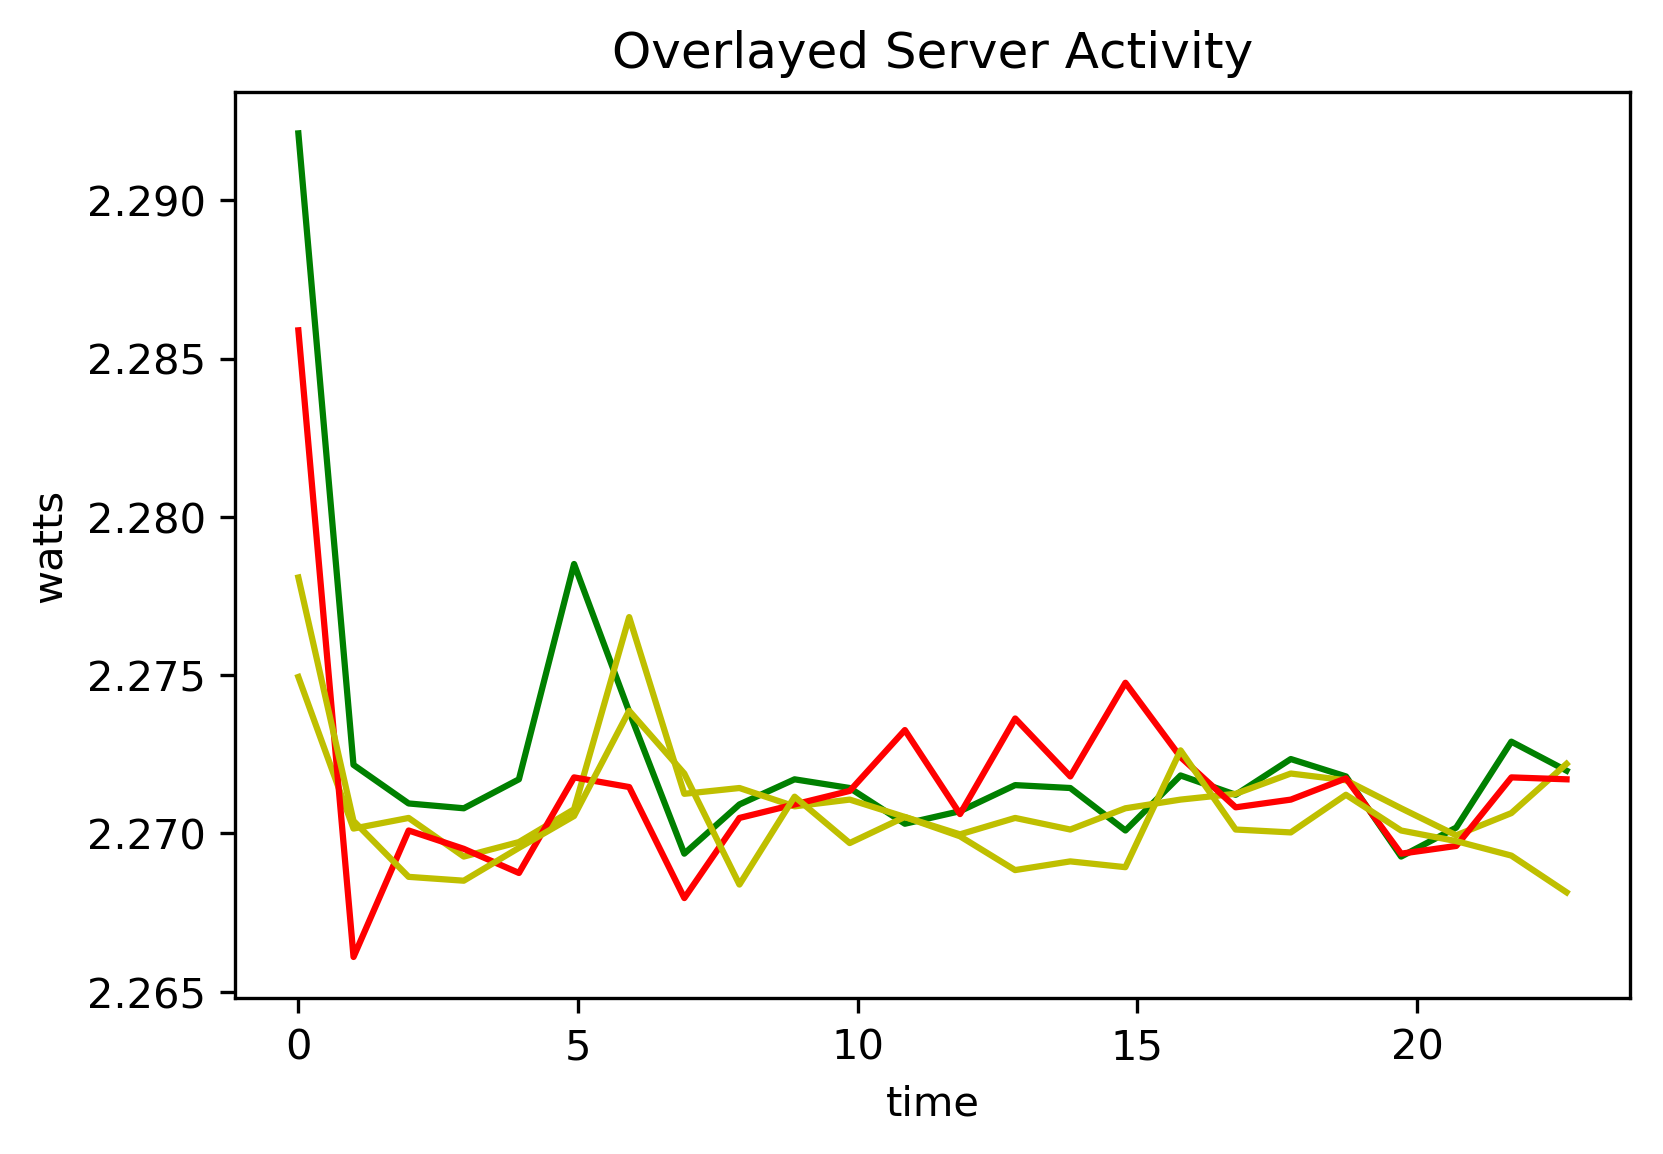

In [382]:
fig, ax = plt.subplots(dpi=300)

x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='g')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

ax.plot(overlayD2.loc[:,'scaled'], overlayD2.loc[:,'watts'], color='r')
ax.plot(overlayS2.loc[:,'scaled'], overlayS2.loc[:,'watts'], color='y')

#ax.grid()

fig.savefig("aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png")
plt.show()